<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Sales Prediction Analysis<br></p>

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>Data Source: Bigmart Sales Data Set from Analytics Vidhya</p>

The objective of this analysis is to fit a regression model to predict the amount of sales a store makes.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("train.csv")
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold"><br>
Exploratory Data Analysis<br></p>

There are many missing values in "Item_Weight" and "Outlet_Size".
"Item_Visibility" has a minimum value of 0 which is impossible - an item cannot be invisible when sold in a store.
"Outlet_Establishment_Year" ranges from 1985 to 2009 which can be converted to how old the store is instead.

In [36]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [37]:
df.apply(lambda x: sum(x.isnull()), axis = 0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [38]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

**Display Categorical Variables**

The "Item_Fat_Content" variable has "Low Fat" additionally labelled as "LF" and "low fat". "Regular" is also mislabelled as "reg".

In [39]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [40]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [41]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [42]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [43]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold"><br>
Data Cleaning<br></p>

Replacing missing and impossible values

In [44]:
#Fix mislabellings in fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [45]:
#Fix impossible minimum values of 0 in item visibility
avg_vis = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Replace 0 values with mean visibility of that product
for i in range(0, len(df['Item_Visibility'])):
    curr_item = df.loc[i, ('Item_Identifier')]
    if df.loc[i, ('Item_Visibility')] == 0:
        df.loc[i, ('Item_Visibility')] = avg_vis['Item_Visibility'][curr_item]

print('Number of 0 values after modification: ' + str(sum(df['Item_Visibility'] ==0)))

Number of 0 values after modification: 0


In [46]:
#Replace missing values in item weights
mean_weights = df.pivot_table(values = 'Item_Weight', index = ['Item_Type'], aggfunc = np.mean)
for i in range(0, len(df['Item_Type'])):
    curr_item = df.loc[i, ('Item_Type')]
    if df['Item_Weight'].isna()[i]:
        df.loc[i, ('Item_Weight')] = mean_weights['Item_Weight'][curr_item]

print('Number of missing values after modification: ' + str(sum(df['Item_Weight'].isnull())))

Number of missing values after modification: 0


In [47]:
#Replace missing values in outlet size according to the location and type
small = True
for i in range(0, len(df['Outlet_Type'])):
    curr_type = df.loc[i, ('Outlet_Type')]
    curr_loc = df.loc[i, ('Outlet_Location_Type')]
    if df['Outlet_Size'].isna()[i]:
        if curr_type == 'Supermarket Type(2|3)':
            df.loc[i, ('Outlet_Size')] = 'Medium'
        elif curr_type == 'Supermarket Type1':
            if curr_loc == 'Tier2':
                df.loc[i, ('Outlet_Size')] = 'Small'
            elif curr_loc == 'Tier3':
                df.loc[i, ('Outlet_Size')] = 'High'
            elif 'Tier1' and small:
                df.loc[i, ('Outlet_Size')] = 'Small'
                small = False
            elif 'Tier1' and not small:
                df.loc[i, ('Outlet_Size')] = 'Medium'
                small = True
        else:
            df.loc[i, ('Outlet_Size')] = 'Small'

print('Number of missing values after modification: ' + str(sum(df['Outlet_Size'].isnull())))

Number of missing values after modification: 0


In [48]:
#Adjust outlet establishment year to age
df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Age'].describe()
df.drop(['Outlet_Establishment_Year'], axis = 1, inplace = True)

In [54]:
df.apply(lambda x: sum(x.isnull()), axis = 0)
# no more missing values

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Age              0
dtype: int64

In [55]:
#Transform all categorical variables into numerics
from sklearn.preprocessing import LabelEncoder
var_mod = ['Item_Fat_Content','Item_Type', 'Outlet_Size',
          'Outlet_Location_Type', 'Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content          int64
Item_Visibility         float64
Item_Type                 int64
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size               int64
Outlet_Location_Type      int64
Outlet_Type               int64
Item_Outlet_Sales       float64
Outlet_Age                int64
dtype: object

**Clean Test Data**

In [56]:
df_test = pd.read_csv('test.csv')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

avg_vis2 = df_test.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Replace 0 values with mean visibility of that product
for i in range(0, len(df_test['Item_Visibility'])):
    curr_item = df_test.loc[i, ('Item_Identifier')]
    if df_test.loc[i, ('Item_Visibility')] == 0:
        df_test.loc[i, ('Item_Visibility')] = avg_vis2['Item_Visibility'][curr_item]

mean_weights = df_test.pivot_table(values = 'Item_Weight', index = ['Item_Type'], aggfunc = np.mean)
for i in range(0, len(df_test['Item_Type'])):
    curr_item = df_test.loc[i, ('Item_Type')]
    if df_test['Item_Weight'].isna()[i]:
        df_test.loc[i, ('Item_Weight')] = mean_weights['Item_Weight'][curr_item]
        
small = True
for i in range(0, len(df_test['Outlet_Type'])):
    curr_type = df_test.loc[i, ('Outlet_Type')]
    curr_loc = df_test.loc[i, ('Outlet_Location_Type')]
    if df_test['Outlet_Size'].isna()[i]:
        if curr_type == 'Supermarket Type(2|3)':
            df_test.loc[i, ('Outlet_Size')] = 'Medium'
        elif curr_type == 'Supermarket Type1':
            if curr_loc == 'Tier2':
                df_test.loc[i, ('Outlet_Size')] = 'Small'
            elif curr_loc == 'Tier3':
                df_test.loc[i, ('Outlet_Size')] = 'High'
            elif 'Tier1' and small:
                df_test.loc[i, ('Outlet_Size')] = 'Small'
                small = False
            elif 'Tier1' and not small:
                df_test.loc[i, ('Outlet_Size')] = 'Medium'
                small = True
        else:
            df_test.loc[i, ('Outlet_Size')] = 'Small'

#Adjust outlet establishment year to age
df_test['Outlet_Age'] = 2013 - df_test['Outlet_Establishment_Year']
df_test.drop(['Outlet_Establishment_Year'], axis = 1, inplace = True)

from sklearn.preprocessing import LabelEncoder
var_mod = ['Item_Fat_Content','Item_Type', 'Outlet_Size',
          'Outlet_Location_Type', 'Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])
df_test.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content          int64
Item_Visibility         float64
Item_Type                 int64
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size               int64
Outlet_Location_Type      int64
Outlet_Type               int64
Outlet_Age                int64
dtype: object

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold"><br>
Model Fitting<br></p>

In [57]:
#Baseline model - Mean based:
mean_sales = df['Item_Outlet_Sales'].mean()

model1 = df_test.copy()
model1['Item_Outlet_Sales'] = mean_sales

#Export baseline model
model1.to_csv("model1.csv", index = False)

In [58]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold #For K-fold cross validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score

target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']

def regression_model(model, train, test, predictors, target, IDcol, filename):
    model.fit(train[predictors], train[target])
    
    #Predict training set
    predictions = model.predict(train[predictors])
    
    #Cross validation
    cv_score = cross_val_score(model, train[predictors],
                                               train[target], cv = 20,
                                               scoring = 'neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Predict on test data:
    test[target] = model.predict(test[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({x: test[x] for x in IDcol})
    submission.to_csv(filename, index = False)

**Linear Regression Model**
<p>Public LB Score = 1271.42 </p>

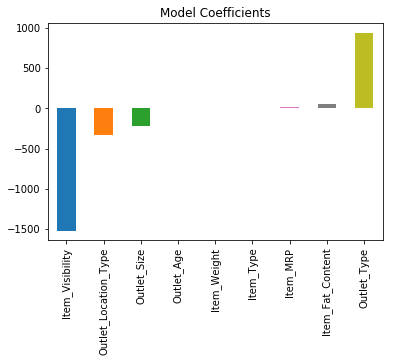

In [59]:
predictors = [x for x in df.columns if x not in [target]+IDcol]
LM1 = LinearRegression(normalize = True)
regression_model(LM1, df, df_test, predictors, target, IDcol, 'LM1.csv')
coef1 = pd.Series(LM1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

**Ridge Regression Model**
<p>Public LB Score = 1273.24</p>

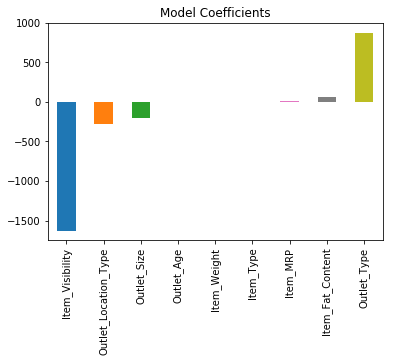

In [60]:
predictors = [x for x in df.columns if x not in [target]+IDcol]
LM2 = Ridge(alpha=0.05,normalize=True)
regression_model(LM2, df, df_test, predictors, target, IDcol, 'LM2.csv')
coef2 = pd.Series(LM2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

**Decision Tree Model**
<p>Public LB Score = 1167.33 (Rank 965)</p>

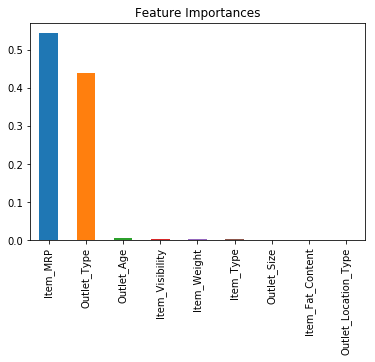

In [61]:
from sklearn.tree import DecisionTreeRegressor
LM3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf = 100)
regression_model(LM3, df, df_test, predictors, target, IDcol, 'LM3.csv')
coef3 = pd.Series(LM3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind = 'bar', title = 'Feature Importances')

**Random Forest Model**
<p>Public LB Score = 1154.16 (Rank 657)</p>

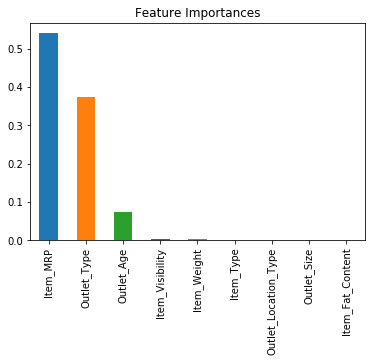

In [62]:
from sklearn.ensemble import RandomForestRegressor
LM4 = RandomForestRegressor(max_depth = 15, min_samples_leaf = 100)
regression_model(LM4, df, df_test, predictors, target, IDcol, 'LM4.csv')
coef4 = pd.Series(LM4.feature_importances_, predictors).sort_values(ascending = False)
coef4.plot(kind = 'bar', title = 'Feature Importances')